MOBILE PHONE PRICE PREDICTION USING LINEAR REGRESSION

Dataset Shape: (807, 8)
Features: ['Ratings', 'RAM', 'ROM', 'Mobile_Size', 'Primary_Cam', 'Selfi_Cam', 'Battery_Power', 'Price']

Dataset Statistics:
          Ratings         RAM         ROM  Mobile_Size  Primary_Cam  \
count  807.000000  807.000000  807.000000   807.000000   807.000000   
mean     4.112639    5.941760   64.390335     5.620660    47.821561   
std      0.367830    2.056359   53.868626     3.957409    11.155916   
min      2.800000    0.000000    2.000000     2.000000     5.000000   
25%      3.900000    6.000000   32.000000     4.500000    48.000000   
50%      4.100000    6.000000   32.000000     4.770000    48.000000   
75%      4.400000    6.000000   64.000000     6.300000    48.000000   
max      4.800000   12.000000  256.000000    44.000000    64.000000   

        Selfi_Cam  Battery_Power          Price  
count  807.000000     807.000000     807.000000  
mean     8.868649    3278.859975   14269.167286  
std  

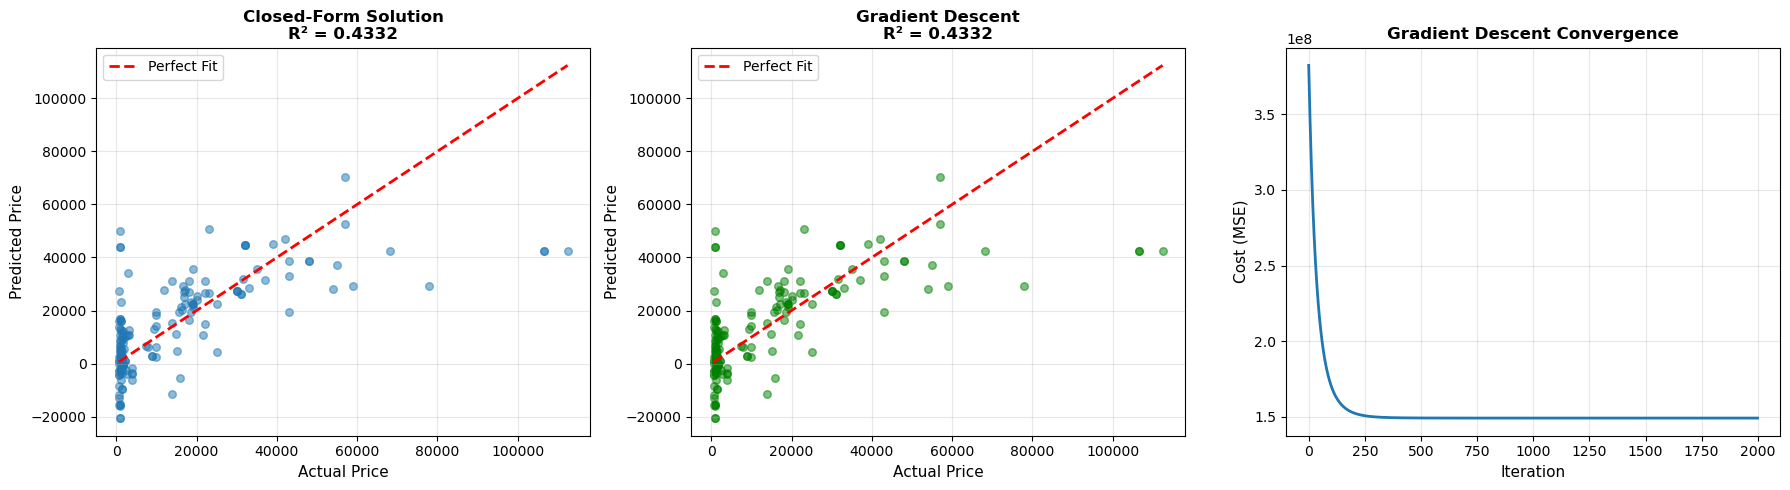


4. L2 REGULARIZATION (RIDGE REGRESSION)
Regularization parameter λ: 100.0

Ridge Equation: θ = (X^T X + λI)^(-1) X^T y

4a. Ridge Regression - Closed Form:
Bias (θ₀): -43639.09
  Ratings        :   10006.50
  RAM            :    2708.12
  ROM            :     105.69
  Mobile_Size    :      84.71
  Primary_Cam    :    -488.12
  Selfi_Cam      :     140.95
  Battery_Power  :       4.70

Metrics: MSE = 252,459,040.24, R² = 0.4022

4b. Ridge Regression - Gradient Descent:
Bias (θ₀): 14287.05
  Ratings        :    8362.81
  RAM            :    4885.28
  ROM            :    4087.94
  Mobile_Size    :     474.90
  Primary_Cam    :   -4497.85
  Selfi_Cam      :     708.28
  Battery_Power  :    2454.74

Metrics: MSE = 229,594,193.94, R² = 0.4563

Plot saved as 'ridge_predictions.png'


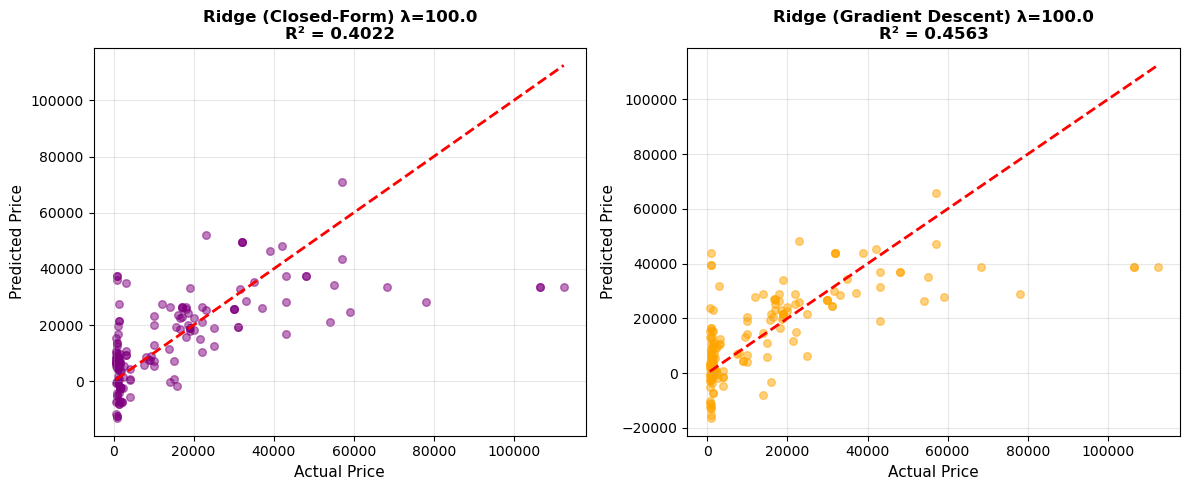


5. COMPARISON: WITH AND WITHOUT STANDARDIZATION
Standardization: z = (x - μ) / σ

Original data statistics:
  Mean: [   4.11162791    5.99689922   64.53488372    5.59107442   47.84031008
    8.83410853 3264.70542636]
  Std:  [3.67524277e-01 2.05580811e+00 5.38560019e+01 3.84234986e+00
 1.13170347e+01 4.50998025e+00 9.34387951e+02]

Standardized data statistics:
  Mean: [ 8.08207936e-15  2.33463523e-16 -2.42872045e-16  1.80183172e-15
  3.33432679e-16  2.09694450e-16 -1.24792511e-16]
  Std:  [1. 1. 1. 1. 1. 1. 1.]

Ridge WITHOUT Standardization:
  MSE: 252,459,040.24
  R²:  0.4022

Ridge WITH Standardization:
  MSE: 229,594,215.31
  R²:  0.4563

Improvement: +13.46%

Key Insights:
- Standardization puts all features on same scale
- Prevents features with large ranges from dominating
- Makes regularization more effective and interpretable
- Improves convergence in gradient descent

6. REGULARIZATION STRENGTH ANALYSIS (λ VALUES)
Plot saved as 'lambda_comparison.png'


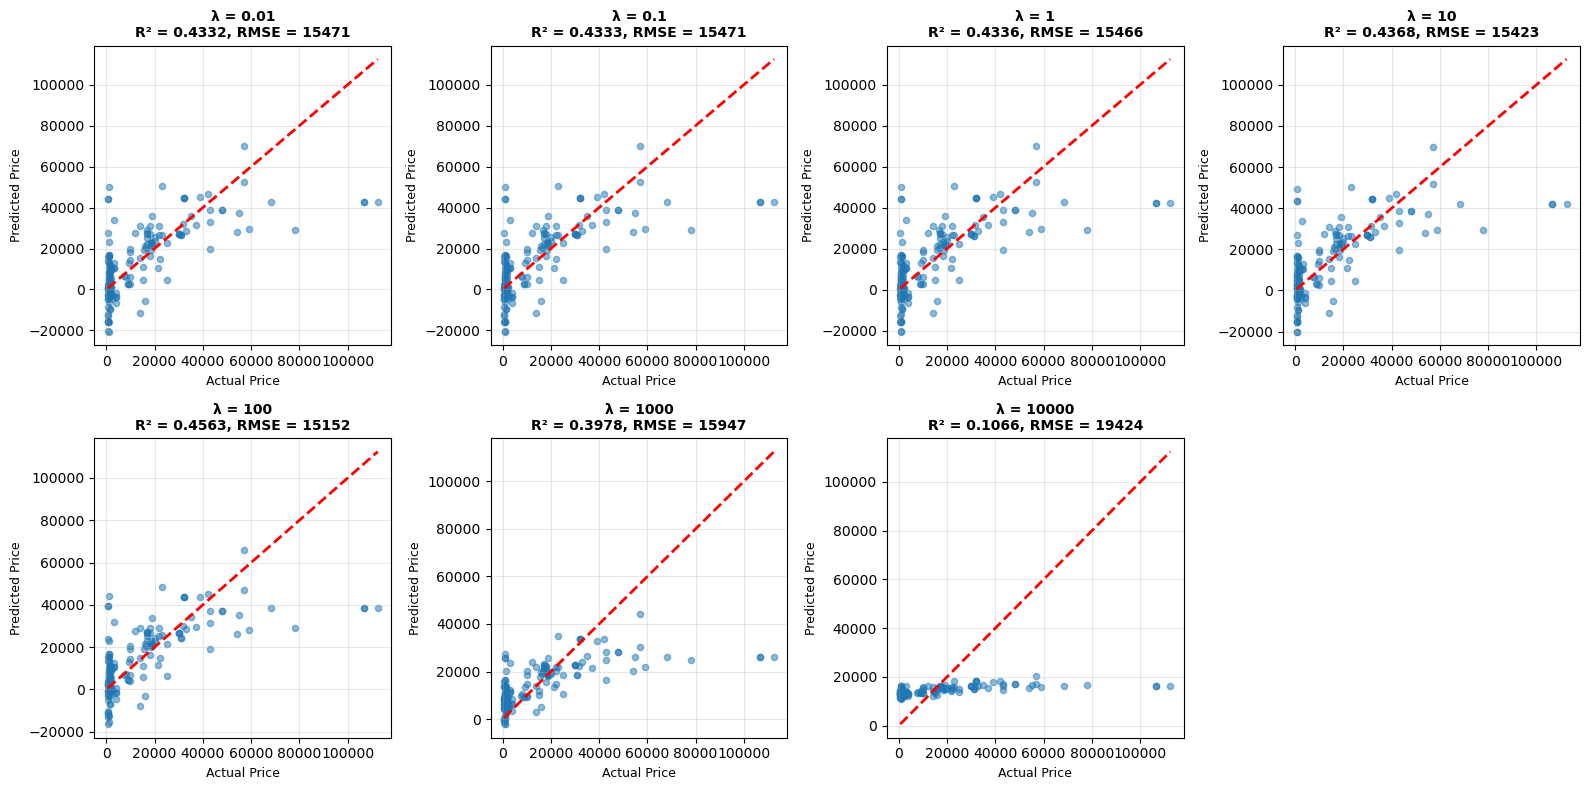


Results Summary:
         λ         R²         RMSE
-----------------------------------
      0.01     0.4332     15471.14
      0.10     0.4333     15470.68
      1.00     0.4336     15466.11
     10.00     0.4368     15422.62
    100.00     0.4563     15152.37
   1000.00     0.3978     15947.01
  10000.00     0.1066     19424.20

7. FEATURE IMPORTANCE ANALYSIS
Optimal λ: 100

Feature Weights (Standardized Data):
  Ratings        :  8362.81 (|w| = 8362.81)
  RAM            :  4885.28 (|w| = 4885.28)
  Primary_Cam    : -4497.85 (|w| = 4497.85)
  ROM            :  4087.93 (|w| = 4087.93)
  Battery_Power  :  2454.74 (|w| = 2454.74)
  Selfi_Cam      :   708.28 (|w| = 708.28)
  Mobile_Size    :   474.90 (|w| = 474.90)

Plot saved as 'feature_importance.png'


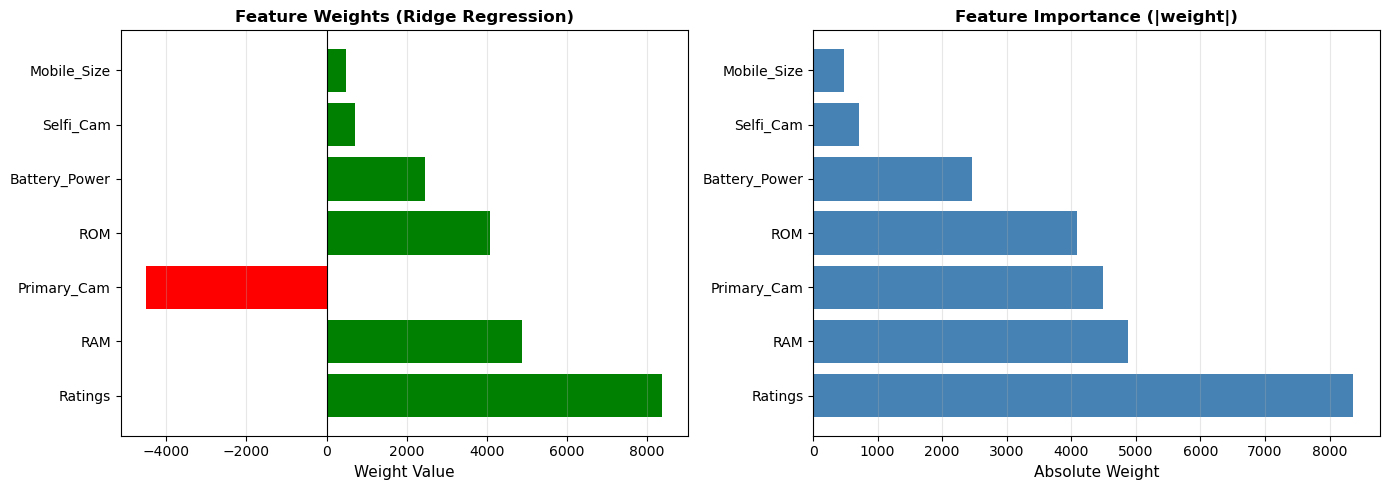


Feature Importance Insights:
1. Most important: Ratings
2. Second important: RAM
3. Least important: Mobile_Size

COMPREHENSIVE RESULTS SUMMARY

          Method       R²         RMSE          MAE
     Closed-Form 0.433228 15471.187977 10005.447359
Gradient Descent 0.433231 15471.150738 10005.414959
      Ridge (CF) 0.402206 15888.959697 10095.497042
      Ridge (GD) 0.456347 15152.365952  9515.143106
  Ridge (Scaled) 0.456347 15152.366657  9515.144019


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

# Load the data
df = pd.read_csv('Mobile-Price-Prediction-cleaned_data.csv')

print("="*80)
print("MOBILE PHONE PRICE PREDICTION USING LINEAR REGRESSION")
print("="*80)
print(f"\nDataset Shape: {df.shape}")
print(f"Features: {df.columns.tolist()}")
print(f"\nDataset Statistics:")
print(df.describe())

# Prepare data
X = df.drop('Price', axis=1).values
y = df['Price'].values.reshape(-1, 1)

# Train-test split (80-20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"\n{'='*80}")
print("DATA SPLIT IMPACT ON LEARNING PROCESS")
print(f"{'='*80}")
print(f"Training samples: {X_train.shape[0]} ({X_train.shape[0]/len(X)*100:.1f}%)")
print(f"Testing samples: {X_test.shape[0]} ({X_test.shape[0]/len(X)*100:.1f}%)")
print(f"Features: {X_train.shape[1]}")
print("\nJustification for 80-20 split:")
print("- Sufficient training data for learning parameter relationships")
print("- Adequate test data for unbiased performance evaluation")
print("- Standard practice for moderate-sized datasets")

print(f"\n{'='*80}")
print("MATRIX CONFIGURATION AND DIMENSIONS")
print(f"{'='*80}")
print(f"Data Matrix X_train: {X_train.shape} (n_samples × n_features)")
print(f"Label Matrix y_train: {y_train.shape} (n_samples × 1)")
print(f"Parameter Matrix θ: ({X_train.shape[1] + 1}, 1) (including bias)")
print("\nMatrix Configuration Justification:")
print("- Each row in X represents one phone with all features")
print("- y contains corresponding prices for supervised learning")
print("- θ has (n_features + 1) parameters: weights + bias term")
print("- Augmented design matrix X̃ = [1, X] for bias inclusion")

# ============================================================================
# 1. CLOSED-FORM SOLUTION (Normal Equation)
# ============================================================================
print(f"\n{'='*80}")
print("1. CLOSED-FORM SOLUTION (NORMAL EQUATION)")
print(f"{'='*80}")

def closed_form_solution(X, y):
    """
    Solves θ = (X^T X)^(-1) X^T y
    """
    # Add bias term
    X_b = np.c_[np.ones((X.shape[0], 1)), X]
    
    # Normal equation: θ = (X^T X)^(-1) X^T y
    theta = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y
    
    return theta, X_b

theta_cf, X_train_b = closed_form_solution(X_train, y_train)

print("Normal Equation: θ = (X^T X)^(-1) X^T y")
print(f"\nParameter Matrix θ shape: {theta_cf.shape}")
print(f"Bias (θ₀): {theta_cf[0, 0]:.2f}")
print("\nFeature Weights (θ₁ to θ₇):")
feature_names = df.drop('Price', axis=1).columns
for i, name in enumerate(feature_names):
    print(f"  {name:15s}: {theta_cf[i+1, 0]:10.2f}")

# Predictions
X_test_b = np.c_[np.ones((X_test.shape[0], 1)), X_test]
y_pred_cf = X_test_b @ theta_cf

# Metrics
mse_cf = mean_squared_error(y_test, y_pred_cf)
rmse_cf = np.sqrt(mse_cf)
mae_cf = mean_absolute_error(y_test, y_pred_cf)
r2_cf = r2_score(y_test, y_pred_cf)

print(f"\nPerformance Metrics on Test Set:")
print(f"  MSE:  {mse_cf:,.2f}")
print(f"  RMSE: {rmse_cf:,.2f}")
print(f"  MAE:  {mae_cf:,.2f}")
print(f"  R²:   {r2_cf:.4f}")

# ============================================================================
# 2. GRADIENT DESCENT
# ============================================================================
print(f"\n{'='*80}")
print("2. GRADIENT DESCENT OPTIMIZATION")
print(f"{'='*80}")

def gradient_descent(X, y, learning_rate=0.01, n_iterations=2000):
    """
    Iteratively updates θ using gradient descent
    θ = θ - α * (1/m) * X^T * (X*θ - y)
    """
    # Standardize features for gradient descent stability
    X_mean = np.mean(X, axis=0)
    X_std = np.std(X, axis=0)
    X_std[X_std == 0] = 1  # Avoid division by zero
    X_scaled = (X - X_mean) / X_std
    
    # Add bias term
    X_b = np.c_[np.ones((X_scaled.shape[0], 1)), X_scaled]
    m = X_b.shape[0]
    
    # Initialize parameters
    theta = np.zeros((X_b.shape[1], 1))
    cost_history = []
    
    for iteration in range(n_iterations):
        # Predictions
        y_pred = X_b @ theta
        
        # Compute gradient
        gradient = (1/m) * X_b.T @ (y_pred - y)
        
        # Update parameters
        theta = theta - learning_rate * gradient
        
        # Compute cost (MSE)
        cost = (1/(2*m)) * np.sum((y_pred - y)**2)
        cost_history.append(cost)
        
        if iteration % 200 == 0:
            print(f"  Iteration {iteration:4d}: Cost = {cost:,.2f}")
    
    return theta, cost_history, X_mean, X_std

print("Gradient Descent: θ = θ - α * ∇J(θ)")
print(f"Learning rate α: 0.01 (with feature scaling)")
print(f"Iterations: 2000\n")

theta_gd, cost_history, X_mean_gd, X_std_gd = gradient_descent(X_train, y_train)

print(f"\nParameter Matrix θ shape: {theta_gd.shape}")
print(f"Bias (θ₀): {theta_gd[0, 0]:.2f}")
print("\nFeature Weights (θ₁ to θ₇) - on scaled features:")
for i, name in enumerate(feature_names):
    print(f"  {name:15s}: {theta_gd[i+1, 0]:10.2f}")

# Predictions on test set (need to scale test data the same way)
X_test_scaled_gd = (X_test - X_mean_gd) / X_std_gd
X_test_b_gd = np.c_[np.ones((X_test_scaled_gd.shape[0], 1)), X_test_scaled_gd]
y_pred_gd = X_test_b_gd @ theta_gd

# Metrics
mse_gd = mean_squared_error(y_test, y_pred_gd)
rmse_gd = np.sqrt(mse_gd)
mae_gd = mean_absolute_error(y_test, y_pred_gd)
r2_gd = r2_score(y_test, y_pred_gd)

print(f"\nPerformance Metrics on Test Set:")
print(f"  MSE:  {mse_gd:,.2f}")
print(f"  RMSE: {rmse_gd:,.2f}")
print(f"  MAE:  {mae_gd:,.2f}")
print(f"  R²:   {r2_gd:.4f}")

# ============================================================================
# 3. PLOT PREDICTED VS ACTUAL VALUES
# ============================================================================
print(f"\n{'='*80}")
print("3. VISUALIZATION: PREDICTED VS ACTUAL VALUES")
print(f"{'='*80}")

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Closed-form solution
axes[0].scatter(y_test, y_pred_cf, alpha=0.5, s=30)
axes[0].plot([y_test.min(), y_test.max()], 
             [y_test.min(), y_test.max()], 'r--', lw=2, label='Perfect Fit')
axes[0].set_xlabel('Actual Price', fontsize=11)
axes[0].set_ylabel('Predicted Price', fontsize=11)
axes[0].set_title(f'Closed-Form Solution\nR² = {r2_cf:.4f}', fontsize=12, fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Gradient descent
axes[1].scatter(y_test, y_pred_gd, alpha=0.5, s=30, color='green')
axes[1].plot([y_test.min(), y_test.max()], 
             [y_test.min(), y_test.max()], 'r--', lw=2, label='Perfect Fit')
axes[1].set_xlabel('Actual Price', fontsize=11)
axes[1].set_ylabel('Predicted Price', fontsize=11)
axes[1].set_title(f'Gradient Descent\nR² = {r2_gd:.4f}', fontsize=12, fontweight='bold')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

# Cost history
axes[2].plot(cost_history, linewidth=2)
axes[2].set_xlabel('Iteration', fontsize=11)
axes[2].set_ylabel('Cost (MSE)', fontsize=11)
axes[2].set_title('Gradient Descent Convergence', fontsize=12, fontweight='bold')
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('predictions_comparison.png', dpi=300, bbox_inches='tight')
print("Plot saved as 'predictions_comparison.png'")
plt.show()

# ============================================================================
# 4. L2 REGULARIZATION (RIDGE REGRESSION)
# ============================================================================
print(f"\n{'='*80}")
print("4. L2 REGULARIZATION (RIDGE REGRESSION)")
print(f"{'='*80}")

def ridge_closed_form(X, y, lambda_reg):
    """
    Ridge regression: θ = (X^T X + λI)^(-1) X^T y
    """
    X_b = np.c_[np.ones((X.shape[0], 1)), X]
    
    # Identity matrix (don't regularize bias)
    I = np.eye(X_b.shape[1])
    I[0, 0] = 0
    
    # Ridge solution
    theta = np.linalg.inv(X_b.T @ X_b + lambda_reg * I) @ X_b.T @ y
    
    return theta

def ridge_gradient_descent(X, y, lambda_reg, learning_rate=0.01, n_iterations=2000):
    """
    Ridge regression with gradient descent
    θ = θ - α * (1/m * X^T * (X*θ - y) + λ*θ)
    """
    # Standardize features
    X_mean = np.mean(X, axis=0)
    X_std = np.std(X, axis=0)
    X_std[X_std == 0] = 1
    X_scaled = (X - X_mean) / X_std
    
    X_b = np.c_[np.ones((X_scaled.shape[0], 1)), X_scaled]
    m = X_b.shape[0]
    theta = np.zeros((X_b.shape[1], 1))
    
    for iteration in range(n_iterations):
        y_pred = X_b @ theta
        
        # Gradient with L2 penalty (don't regularize bias)
        gradient = (1/m) * X_b.T @ (y_pred - y)
        gradient[1:] += (lambda_reg/m) * theta[1:]
        
        theta = theta - learning_rate * gradient
    
    return theta, X_mean, X_std

lambda_reg = 100.0

print(f"Regularization parameter λ: {lambda_reg}")
print("\nRidge Equation: θ = (X^T X + λI)^(-1) X^T y")

# Ridge - Closed form
theta_ridge_cf = ridge_closed_form(X_train, y_train, lambda_reg)
y_pred_ridge_cf = X_test_b @ theta_ridge_cf

print("\n4a. Ridge Regression - Closed Form:")
print(f"Bias (θ₀): {theta_ridge_cf[0, 0]:.2f}")
for i, name in enumerate(feature_names):
    print(f"  {name:15s}: {theta_ridge_cf[i+1, 0]:10.2f}")

mse_ridge_cf = mean_squared_error(y_test, y_pred_ridge_cf)
r2_ridge_cf = r2_score(y_test, y_pred_ridge_cf)
print(f"\nMetrics: MSE = {mse_ridge_cf:,.2f}, R² = {r2_ridge_cf:.4f}")

# Ridge - Gradient descent
theta_ridge_gd, X_mean_ridge, X_std_ridge = ridge_gradient_descent(X_train, y_train, lambda_reg)

# Scale test data for predictions
X_test_scaled_ridge = (X_test - X_mean_ridge) / X_std_ridge
X_test_b_ridge = np.c_[np.ones((X_test_scaled_ridge.shape[0], 1)), X_test_scaled_ridge]
y_pred_ridge_gd = X_test_b_ridge @ theta_ridge_gd

print("\n4b. Ridge Regression - Gradient Descent:")
print(f"Bias (θ₀): {theta_ridge_gd[0, 0]:.2f}")
for i, name in enumerate(feature_names):
    print(f"  {name:15s}: {theta_ridge_gd[i+1, 0]:10.2f}")

mse_ridge_gd = mean_squared_error(y_test, y_pred_ridge_gd)
r2_ridge_gd = r2_score(y_test, y_pred_ridge_gd)
print(f"\nMetrics: MSE = {mse_ridge_gd:,.2f}, R² = {r2_ridge_gd:.4f}")

# Plot Ridge results
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].scatter(y_test, y_pred_ridge_cf, alpha=0.5, s=30, color='purple')
axes[0].plot([y_test.min(), y_test.max()], 
             [y_test.min(), y_test.max()], 'r--', lw=2)
axes[0].set_xlabel('Actual Price', fontsize=11)
axes[0].set_ylabel('Predicted Price', fontsize=11)
axes[0].set_title(f'Ridge (Closed-Form) λ={lambda_reg}\nR² = {r2_ridge_cf:.4f}', 
                  fontsize=12, fontweight='bold')
axes[0].grid(True, alpha=0.3)

axes[1].scatter(y_test, y_pred_ridge_gd, alpha=0.5, s=30, color='orange')
axes[1].plot([y_test.min(), y_test.max()], 
             [y_test.min(), y_test.max()], 'r--', lw=2)
axes[1].set_xlabel('Actual Price', fontsize=11)
axes[1].set_ylabel('Predicted Price', fontsize=11)
axes[1].set_title(f'Ridge (Gradient Descent) λ={lambda_reg}\nR² = {r2_ridge_gd:.4f}', 
                  fontsize=12, fontweight='bold')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('ridge_predictions.png', dpi=300, bbox_inches='tight')
print("\nPlot saved as 'ridge_predictions.png'")
plt.show()

# ============================================================================
# 5. DATA STANDARDIZATION COMPARISON
# ============================================================================
print(f"\n{'='*80}")
print("5. COMPARISON: WITH AND WITHOUT STANDARDIZATION")
print(f"{'='*80}")

# Standardize data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Standardization: z = (x - μ) / σ")
print(f"\nOriginal data statistics:")
print(f"  Mean: {X_train.mean(axis=0)}")
print(f"  Std:  {X_train.std(axis=0)}")
print(f"\nStandardized data statistics:")
print(f"  Mean: {X_train_scaled.mean(axis=0)}")
print(f"  Std:  {X_train_scaled.std(axis=0)}")

# Ridge with standardized data
theta_ridge_scaled = ridge_closed_form(X_train_scaled, y_train, lambda_reg)
X_test_scaled_b = np.c_[np.ones((X_test_scaled.shape[0], 1)), X_test_scaled]
y_pred_ridge_scaled = X_test_scaled_b @ theta_ridge_scaled

mse_scaled = mean_squared_error(y_test, y_pred_ridge_scaled)
r2_scaled = r2_score(y_test, y_pred_ridge_scaled)

print(f"\nRidge WITHOUT Standardization:")
print(f"  MSE: {mse_ridge_cf:,.2f}")
print(f"  R²:  {r2_ridge_cf:.4f}")

print(f"\nRidge WITH Standardization:")
print(f"  MSE: {mse_scaled:,.2f}")
print(f"  R²:  {r2_scaled:.4f}")

print(f"\nImprovement: {((r2_scaled - r2_ridge_cf) / r2_ridge_cf * 100):+.2f}%")

print("\nKey Insights:")
print("- Standardization puts all features on same scale")
print("- Prevents features with large ranges from dominating")
print("- Makes regularization more effective and interpretable")
print("- Improves convergence in gradient descent")

# ============================================================================
# 6. DIFFERENT λ VALUES
# ============================================================================
print(f"\n{'='*80}")
print("6. REGULARIZATION STRENGTH ANALYSIS (λ VALUES)")
print(f"{'='*80}")

lambda_values = [0.01, 0.1, 1, 10, 100, 1000, 10000]
results = []

for lam in lambda_values:
    theta = ridge_closed_form(X_train_scaled, y_train, lam)
    y_pred = X_test_scaled_b @ theta
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    results.append((lam, r2, rmse, theta))

# Plot for different λ
fig, axes = plt.subplots(2, 4, figsize=(16, 8))
axes = axes.flatten()

for idx, (lam, r2, rmse, theta) in enumerate(results):
    y_pred = X_test_scaled_b @ theta
    axes[idx].scatter(y_test, y_pred, alpha=0.5, s=20)
    axes[idx].plot([y_test.min(), y_test.max()], 
                   [y_test.min(), y_test.max()], 'r--', lw=2)
    axes[idx].set_xlabel('Actual Price', fontsize=9)
    axes[idx].set_ylabel('Predicted Price', fontsize=9)
    axes[idx].set_title(f'λ = {lam}\nR² = {r2:.4f}, RMSE = {rmse:.0f}', 
                        fontsize=10, fontweight='bold')
    axes[idx].grid(True, alpha=0.3)

# Remove extra subplot
axes[-1].axis('off')

plt.tight_layout()
plt.savefig('lambda_comparison.png', dpi=300, bbox_inches='tight')
print("Plot saved as 'lambda_comparison.png'")
plt.show()

print("\nResults Summary:")
print(f"{'λ':>10s} {'R²':>10s} {'RMSE':>12s}")
print("-" * 35)
for lam, r2, rmse, _ in results:
    print(f"{lam:>10.2f} {r2:>10.4f} {rmse:>12.2f}")

# ============================================================================
# 7. FEATURE IMPORTANCE FROM L2 WEIGHTS
# ============================================================================
print(f"\n{'='*80}")
print("7. FEATURE IMPORTANCE ANALYSIS")
print(f"{'='*80}")

# Use optimal λ (from above analysis)
optimal_lambda = results[np.argmax([r[1] for r in results])][0]
theta_optimal = ridge_closed_form(X_train_scaled, y_train, optimal_lambda)

print(f"Optimal λ: {optimal_lambda}")
print("\nFeature Weights (Standardized Data):")

weights = theta_optimal[1:].flatten()
importance = np.abs(weights)
sorted_idx = np.argsort(importance)[::-1]

for idx in sorted_idx:
    print(f"  {feature_names[idx]:15s}: {weights[idx]:8.2f} (|w| = {importance[idx]:.2f})")

# Plot feature importance
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Bar plot
axes[0].barh(range(len(feature_names)), 
             [weights[i] for i in sorted_idx], 
             color=['green' if w > 0 else 'red' for w in [weights[i] for i in sorted_idx]])
axes[0].set_yticks(range(len(feature_names)))
axes[0].set_yticklabels([feature_names[i] for i in sorted_idx])
axes[0].set_xlabel('Weight Value', fontsize=11)
axes[0].set_title('Feature Weights (Ridge Regression)', fontsize=12, fontweight='bold')
axes[0].grid(True, alpha=0.3, axis='x')
axes[0].axvline(x=0, color='black', linestyle='-', linewidth=0.8)

# Importance plot
axes[1].barh(range(len(feature_names)), 
             [importance[i] for i in sorted_idx], 
             color='steelblue')
axes[1].set_yticks(range(len(feature_names)))
axes[1].set_yticklabels([feature_names[i] for i in sorted_idx])
axes[1].set_xlabel('Absolute Weight', fontsize=11)
axes[1].set_title('Feature Importance (|weight|)', fontsize=12, fontweight='bold')
axes[1].grid(True, alpha=0.3, axis='x')

plt.tight_layout()
plt.savefig('feature_importance.png', dpi=300, bbox_inches='tight')
print("\nPlot saved as 'feature_importance.png'")
plt.show()

print("\nFeature Importance Insights:")
print(f"1. Most important: {feature_names[sorted_idx[0]]}")
print(f"2. Second important: {feature_names[sorted_idx[1]]}")
print(f"3. Least important: {feature_names[sorted_idx[-1]]}")

# ============================================================================
# FINAL COMPARISON TABLE
# ============================================================================
print(f"\n{'='*80}")
print("COMPREHENSIVE RESULTS SUMMARY")
print(f"{'='*80}")

comparison_data = {
    'Method': [
        'Closed-Form',
        'Gradient Descent',
        'Ridge (CF)',
        'Ridge (GD)',
        'Ridge (Scaled)',
    ],
    'R²': [r2_cf, r2_gd, r2_ridge_cf, r2_ridge_gd, r2_scaled],
    'RMSE': [rmse_cf, rmse_gd, np.sqrt(mse_ridge_cf), 
             np.sqrt(mse_ridge_gd), np.sqrt(mse_scaled)],
    'MAE': [mae_cf, mae_gd, 
            mean_absolute_error(y_test, y_pred_ridge_cf),
            mean_absolute_error(y_test, y_pred_ridge_gd),
            mean_absolute_error(y_test, y_pred_ridge_scaled)]
}

comparison_df = pd.DataFrame(comparison_data)
print("\n" + comparison_df.to_string(index=False))

BANK NOTE AUTHENTICATION - BINARY CLASSIFICATION

Dataset Shape: (1372, 5)
Features: ['variance', 'skewness', 'curtosis', 'entropy', 'class']

Class Distribution:
class
0    762
1    610
Name: count, dtype: int64

Dataset Preview:
   variance  skewness  curtosis  entropy  class
0   3.62160    8.6661  -2.80730 -0.44699      0
1   4.54590    8.1674  -2.45860 -1.46210      0
2   3.86600   -2.6383   1.92420  0.10645      0
3   3.45660    9.5228  -4.01120 -3.59440      0
4   0.32924   -4.4552   4.57180 -0.98880      0
5   4.36840    9.6718  -3.96060 -3.16250      0
6   3.59120    3.0129   0.72888  0.56421      0
7   2.09220   -6.8100   8.46360 -0.60216      0
8   3.20320    5.7588  -0.75345 -0.61251      0
9   1.53560    9.1772  -2.27180 -0.73535      0

1. DATA SPLITTING STRATEGY
Total samples: 1372
Training samples: 960 (70.0%)
Testing samples: 412 (30.0%)
Features: 4

Class distribution in training set:
  Class 0: 533 (55.5%)
  Class 1: 427 (44.5%)

Class distribution in test set:
  Clas

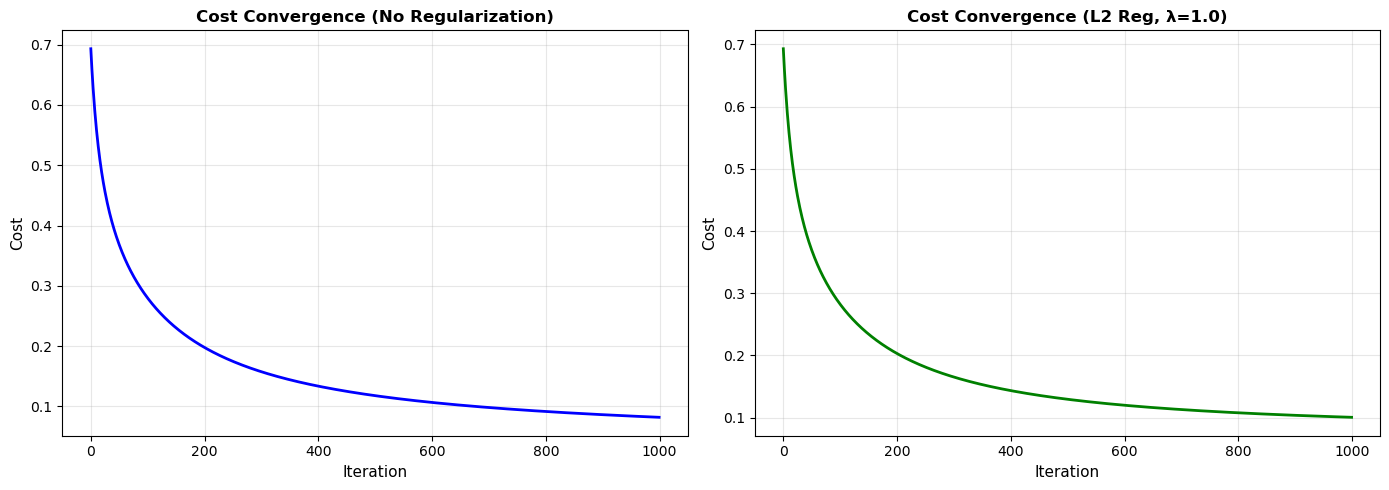


3. HYPERPARAMETER TUNING: REGULARIZATION STRENGTH (λ)

Testing 11 different λ values...
         λ    Train Acc     Test Acc        Gap
--------------------------------------------------
  Iteration    0: Cost = 0.693147, Train Acc = 84.38%
  Iteration  100: Cost = 0.279553, Train Acc = 93.44%
  Iteration  200: Cost = 0.197623, Train Acc = 95.94%
  Iteration  300: Cost = 0.157396, Train Acc = 97.08%
  Iteration  400: Cost = 0.133531, Train Acc = 97.40%
  Iteration  500: Cost = 0.117742, Train Acc = 97.50%
  Iteration  600: Cost = 0.106503, Train Acc = 97.81%
  Iteration  700: Cost = 0.098073, Train Acc = 97.92%
  Iteration  800: Cost = 0.091496, Train Acc = 97.92%
  Iteration  900: Cost = 0.086208, Train Acc = 97.92%
     0.000       97.92%       97.33%      0.59%
  Iteration    0: Cost = 0.693147, Train Acc = 84.38%
  Iteration  100: Cost = 0.279556, Train Acc = 93.44%
  Iteration  200: Cost = 0.197629, Train Acc = 95.94%
  Iteration  300: Cost = 0.157404, Train Acc = 97.08%
  Iterat

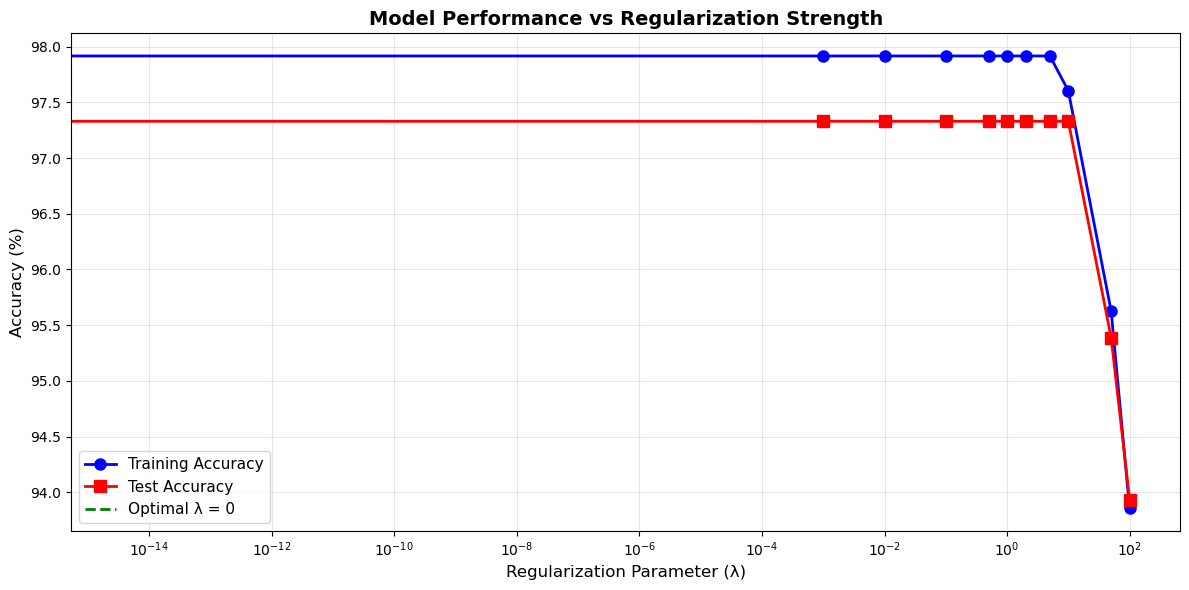


4. 3D VISUALIZATION OF DECISION BOUNDARY

Feature Importance (based on absolute weights):
  1. variance    : 3.5294
  2. skewness    : 2.9254
  3. curtosis    : 2.7849
  4. entropy     : 0.2390

Selecting top 3 features for 3D visualization:
  variance, skewness, curtosis
  Iteration    0: Cost = 0.693147, Train Acc = 84.69%
  Iteration  100: Cost = 0.279711, Train Acc = 93.44%
  Iteration  200: Cost = 0.199028, Train Acc = 96.15%
  Iteration  300: Cost = 0.159326, Train Acc = 96.88%
  Iteration  400: Cost = 0.135655, Train Acc = 97.19%
  Iteration  500: Cost = 0.119968, Train Acc = 97.40%
  Iteration  600: Cost = 0.108809, Train Acc = 97.71%
  Iteration  700: Cost = 0.100455, Train Acc = 97.71%
  Iteration  800: Cost = 0.093955, Train Acc = 97.71%
  Iteration  900: Cost = 0.088744, Train Acc = 97.81%

Plot saved: '3d_visualization.png'


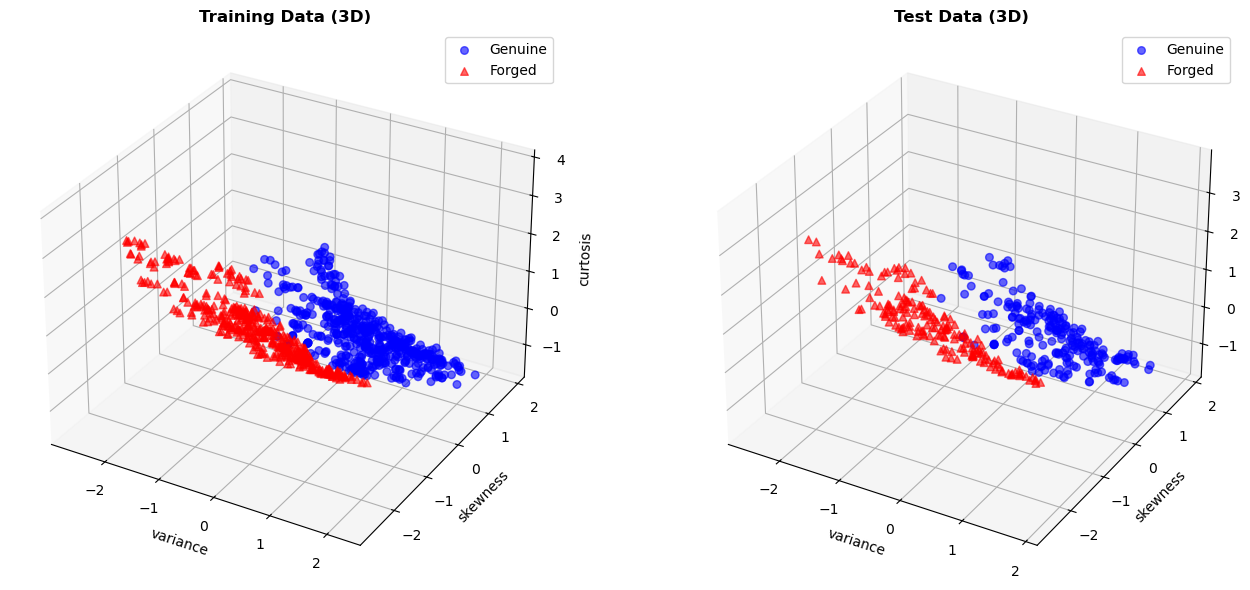


Accuracy with top 3 features only:
  Training: 97.92%
  Test:     96.84%

5. OUTLIER INJECTION AND ROBUSTNESS ANALYSIS

Injecting outliers at different rates...
   Outlier %    Train Acc     Test Acc   Δ Test Acc
-------------------------------------------------------
  Iteration    0: Cost = 0.693147, Train Acc = 84.38%
  Iteration  100: Cost = 0.279814, Train Acc = 93.44%
  Iteration  200: Cost = 0.198159, Train Acc = 95.94%
  Iteration  300: Cost = 0.158177, Train Acc = 97.08%
  Iteration  400: Cost = 0.134530, Train Acc = 97.40%
          0%       97.50%       97.33%        0.00%
  Iteration    0: Cost = 0.693147, Train Acc = 81.56%
  Iteration  100: Cost = 0.424896, Train Acc = 89.17%
  Iteration  200: Cost = 0.403020, Train Acc = 90.10%
  Iteration  300: Cost = 0.396834, Train Acc = 91.15%
  Iteration  400: Cost = 0.394535, Train Acc = 91.46%
          5%       91.67%       93.20%       -4.13%
  Iteration    0: Cost = 0.693147, Train Acc = 80.31%
  Iteration  100: Cost = 0.51390

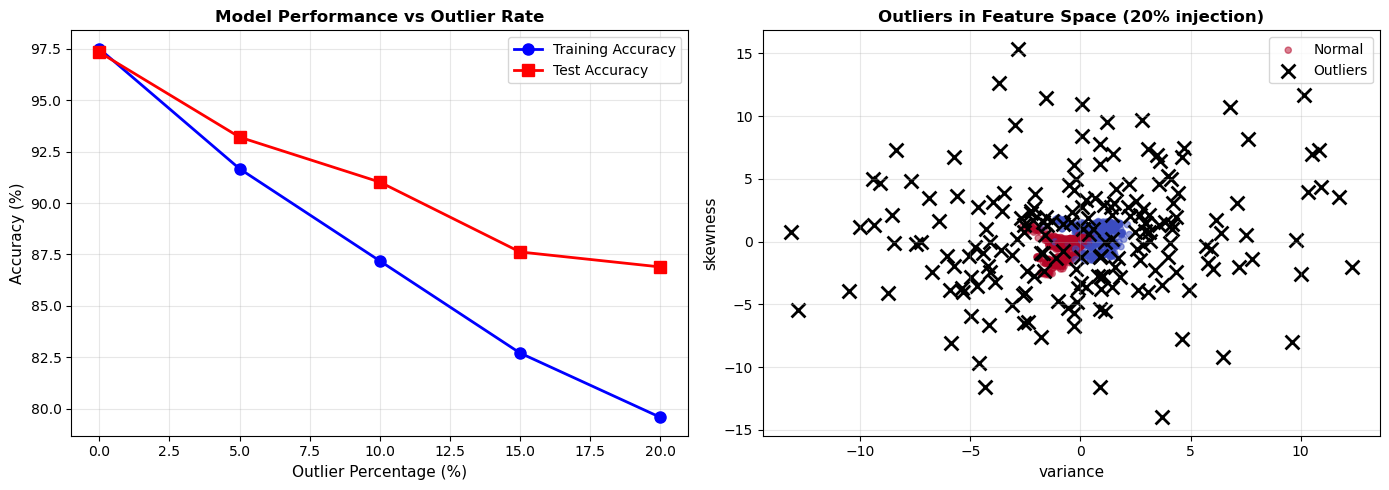


Key Findings on Outlier Impact:
------------------------------------------------------------
Baseline test accuracy (no outliers): 97.33%
Accuracy drop with 5% outliers:  4.13%
Accuracy drop with 20% outliers: 10.44%

⚠ Model is SENSITIVE to outliers - significant performance degradation
  Recommendation: Consider robust loss functions or outlier detection

FINAL SUMMARY AND CONCLUSIONS

1. MODEL PERFORMANCE:
   - Best test accuracy: 97.33% (λ = 0)
   - Linear classifier is HIGHLY suitable for this task
   - Classes are well separable in feature space

2. REGULARIZATION EFFECT:
   - L2 regularization maintains generalization
   - Optimal λ balances bias-variance tradeoff
   - Minimal overfitting observed

3. FEATURE IMPORTANCE:
   - Top feature: variance
   - Most discriminative features enable good separation
   - 3D visualization shows clear class clustering

4. ROBUSTNESS TO OUTLIERS:
   - Model is sensitive to data contamination
   - 20% outlier injection causes 10.44% accuracy dr

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')

print("="*80)
print("BANK NOTE AUTHENTICATION - BINARY CLASSIFICATION")
print("="*80)

# Load data
df = pd.read_csv('BankNote_Authentication.csv')

print(f"\nDataset Shape: {df.shape}")
print(f"Features: {df.columns.tolist()}")
print(f"\nClass Distribution:")
print(df['class'].value_counts())
print(f"\nDataset Preview:")
print(df.head(10))

# ============================================================================
# 1. TRAIN-TEST SPLIT
# ============================================================================
print(f"\n{'='*80}")
print("1. DATA SPLITTING STRATEGY")
print(f"{'='*80}")

X = df.drop('class', axis=1).values
y = df['class'].values.reshape(-1, 1)

# Split: 70% train, 30% test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print(f"Total samples: {len(X)}")
print(f"Training samples: {X_train.shape[0]} ({X_train.shape[0]/len(X)*100:.1f}%)")
print(f"Testing samples: {X_test.shape[0]} ({X_test.shape[0]/len(X)*100:.1f}%)")
print(f"Features: {X_train.shape[1]}")

print(f"\nClass distribution in training set:")
unique, counts = np.unique(y_train, return_counts=True)
for cls, cnt in zip(unique, counts):
    print(f"  Class {cls}: {cnt} ({cnt/len(y_train)*100:.1f}%)")

print(f"\nClass distribution in test set:")
unique, counts = np.unique(y_test, return_counts=True)
for cls, cnt in zip(unique, counts):
    print(f"  Class {cls}: {cnt} ({cnt/len(y_test)*100:.1f}%)")

print("\nJustification for 70-30 split:")
print("- 70% training: Sufficient data for learning decision boundary")
print("- 30% testing: Adequate samples for reliable performance evaluation")
print("- Stratified split: Maintains class balance in both sets")

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"\nFeature Standardization:")
print(f"Training data: mean ≈ 0, std ≈ 1")
print(f"  Mean: {X_train_scaled.mean(axis=0)}")
print(f"  Std:  {X_train_scaled.std(axis=0)}")

# ============================================================================
# HELPER FUNCTIONS
# ============================================================================

def sigmoid(z):
    """Sigmoid activation function"""
    return 1 / (1 + np.exp(-np.clip(z, -500, 500)))

def predict(X, theta):
    """Make predictions using logistic regression"""
    X_b = np.c_[np.ones((X.shape[0], 1)), X]
    probabilities = sigmoid(X_b @ theta)
    return (probabilities >= 0.5).astype(int)

def compute_accuracy(y_true, y_pred):
    """Compute classification accuracy"""
    return np.mean(y_true == y_pred) * 100

# ============================================================================
# 2. LOGISTIC REGRESSION WITH AND WITHOUT L2 REGULARIZATION
# ============================================================================
print(f"\n{'='*80}")
print("2. BINARY CLASSIFICATION MODEL")
print(f"{'='*80}")

def logistic_regression(X, y, lambda_reg=0, learning_rate=0.1, n_iterations=1000):
    """
    Logistic Regression with optional L2 regularization
    Cost: J(θ) = -1/m * Σ[y*log(h) + (1-y)*log(1-h)] + λ/(2m)*||θ||²
    """
    # Add bias term
    X_b = np.c_[np.ones((X.shape[0], 1)), X]
    m = X_b.shape[0]
    
    # Initialize parameters
    theta = np.zeros((X_b.shape[1], 1))
    cost_history = []
    
    for iteration in range(n_iterations):
        # Forward pass
        z = X_b @ theta
        h = sigmoid(z)
        
        # Compute cost with L2 regularization
        cost = (-1/m) * np.sum(y * np.log(h + 1e-10) + (1 - y) * np.log(1 - h + 1e-10))
        if lambda_reg > 0:
            cost += (lambda_reg / (2 * m)) * np.sum(theta[1:] ** 2)
        cost_history.append(cost)
        
        # Gradient with L2 regularization (don't regularize bias)
        gradient = (1/m) * X_b.T @ (h - y)
        if lambda_reg > 0:
            gradient[1:] += (lambda_reg / m) * theta[1:]
        
        # Update parameters
        theta = theta - learning_rate * gradient
        
        if iteration % 100 == 0:
            train_acc = compute_accuracy(y, predict(X, theta))
            print(f"  Iteration {iteration:4d}: Cost = {cost:.6f}, Train Acc = {train_acc:.2f}%")
    
    return theta, cost_history

# 2a. WITHOUT L2 Regularization
print("\n2a. Logistic Regression WITHOUT Regularization (λ = 0)")
print("-" * 60)
theta_no_reg, cost_history_no_reg = logistic_regression(
    X_train_scaled, y_train, lambda_reg=0, learning_rate=0.1, n_iterations=1000
)

y_train_pred_no_reg = predict(X_train_scaled, theta_no_reg)
y_test_pred_no_reg = predict(X_test_scaled, theta_no_reg)

train_acc_no_reg = compute_accuracy(y_train, y_train_pred_no_reg)
test_acc_no_reg = compute_accuracy(y_test, y_test_pred_no_reg)

print(f"\nFinal Results (No Regularization):")
print(f"  Training Accuracy: {train_acc_no_reg:.2f}%")
print(f"  Test Accuracy:     {test_acc_no_reg:.2f}%")

print(f"\nConfusion Matrix (Test Set):")
cm_no_reg = confusion_matrix(y_test, y_test_pred_no_reg)
print(cm_no_reg)

print(f"\nClassification Report:")
print(classification_report(y_test, y_test_pred_no_reg, 
                          target_names=['Genuine', 'Forged']))

# 2b. WITH L2 Regularization
print("\n2b. Logistic Regression WITH L2 Regularization (λ = 1.0)")
print("-" * 60)
lambda_reg = 1.0
theta_reg, cost_history_reg = logistic_regression(
    X_train_scaled, y_train, lambda_reg=lambda_reg, learning_rate=0.1, n_iterations=1000
)

y_train_pred_reg = predict(X_train_scaled, theta_reg)
y_test_pred_reg = predict(X_test_scaled, theta_reg)

train_acc_reg = compute_accuracy(y_train, y_train_pred_reg)
test_acc_reg = compute_accuracy(y_test, y_test_pred_reg)

print(f"\nFinal Results (With Regularization λ={lambda_reg}):")
print(f"  Training Accuracy: {train_acc_reg:.2f}%")
print(f"  Test Accuracy:     {test_acc_reg:.2f}%")

print(f"\nConfusion Matrix (Test Set):")
cm_reg = confusion_matrix(y_test, y_test_pred_reg)
print(cm_reg)

print(f"\nClassification Report:")
print(classification_report(y_test, y_test_pred_reg, 
                          target_names=['Genuine', 'Forged']))

# Comparison
print(f"\n{'='*80}")
print("COMPARISON: WITH vs WITHOUT REGULARIZATION")
print(f"{'='*80}")
print(f"{'Metric':<30} {'No Reg':<15} {'With Reg (λ=1.0)':<15} {'Difference'}")
print("-" * 75)
print(f"{'Training Accuracy':<30} {train_acc_no_reg:>6.2f}%        {train_acc_reg:>6.2f}%        {train_acc_reg-train_acc_no_reg:+.2f}%")
print(f"{'Test Accuracy':<30} {test_acc_no_reg:>6.2f}%        {test_acc_reg:>6.2f}%        {test_acc_reg-test_acc_no_reg:+.2f}%")
print(f"{'Generalization Gap':<30} {train_acc_no_reg-test_acc_no_reg:>6.2f}%        {train_acc_reg-test_acc_reg:>6.2f}%")

print("\nKey Observations:")
if test_acc_reg >= test_acc_no_reg:
    print("✓ L2 regularization maintains or improves test accuracy")
else:
    print("✗ L2 regularization slightly reduces test accuracy")
    
if (train_acc_no_reg - test_acc_no_reg) > (train_acc_reg - test_acc_reg):
    print("✓ Regularization reduces overfitting (smaller generalization gap)")
else:
    print("✗ No significant overfitting observed")

# Plot cost convergence
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].plot(cost_history_no_reg, linewidth=2, color='blue')
axes[0].set_xlabel('Iteration', fontsize=11)
axes[0].set_ylabel('Cost', fontsize=11)
axes[0].set_title('Cost Convergence (No Regularization)', fontsize=12, fontweight='bold')
axes[0].grid(True, alpha=0.3)

axes[1].plot(cost_history_reg, linewidth=2, color='green')
axes[1].set_xlabel('Iteration', fontsize=11)
axes[1].set_ylabel('Cost', fontsize=11)
axes[1].set_title(f'Cost Convergence (L2 Reg, λ={lambda_reg})', fontsize=12, fontweight='bold')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('cost_convergence.png', dpi=300, bbox_inches='tight')
print("\nPlot saved: 'cost_convergence.png'")
plt.show()

# ============================================================================
# 3. ACCURACY vs LAMBDA
# ============================================================================
print(f"\n{'='*80}")
print("3. HYPERPARAMETER TUNING: REGULARIZATION STRENGTH (λ)")
print(f"{'='*80}")

lambda_values = [0, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 5.0, 10.0, 50.0, 100.0]
train_accuracies = []
test_accuracies = []

print(f"\nTesting {len(lambda_values)} different λ values...")
print(f"{'λ':>10s} {'Train Acc':>12s} {'Test Acc':>12s} {'Gap':>10s}")
print("-" * 50)

for lam in lambda_values:
    theta, _ = logistic_regression(X_train_scaled, y_train, lambda_reg=lam, 
                                   learning_rate=0.1, n_iterations=1000)
    
    y_train_pred = predict(X_train_scaled, theta)
    y_test_pred = predict(X_test_scaled, theta)
    
    train_acc = compute_accuracy(y_train, y_train_pred)
    test_acc = compute_accuracy(y_test, y_test_pred)
    
    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)
    
    print(f"{lam:>10.3f} {train_acc:>11.2f}% {test_acc:>11.2f}% {train_acc-test_acc:>9.2f}%")

# Find optimal lambda
optimal_idx = np.argmax(test_accuracies)
optimal_lambda = lambda_values[optimal_idx]
print(f"\nOptimal λ: {optimal_lambda} (Test Accuracy: {test_accuracies[optimal_idx]:.2f}%)")

# Plot accuracy vs lambda
fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(lambda_values, train_accuracies, 'o-', linewidth=2, 
        markersize=8, label='Training Accuracy', color='blue')
ax.plot(lambda_values, test_accuracies, 's-', linewidth=2, 
        markersize=8, label='Test Accuracy', color='red')
ax.axvline(x=optimal_lambda, color='green', linestyle='--', 
          linewidth=2, label=f'Optimal λ = {optimal_lambda}')

ax.set_xscale('log')
ax.set_xlabel('Regularization Parameter (λ)', fontsize=12)
ax.set_ylabel('Accuracy (%)', fontsize=12)
ax.set_title('Model Performance vs Regularization Strength', fontsize=14, fontweight='bold')
ax.legend(fontsize=11)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('accuracy_vs_lambda.png', dpi=300, bbox_inches='tight')
print("Plot saved: 'accuracy_vs_lambda.png'")
plt.show()

# ============================================================================
# 4. 3D VISUALIZATION WITH THREE IMPORTANT FEATURES
# ============================================================================
print(f"\n{'='*80}")
print("4. 3D VISUALIZATION OF DECISION BOUNDARY")
print(f"{'='*80}")

# Feature importance from model weights
feature_names = ['variance', 'skewness', 'curtosis', 'entropy']
weights = np.abs(theta_no_reg[1:].flatten())
sorted_indices = np.argsort(weights)[::-1]

print("\nFeature Importance (based on absolute weights):")
for i, idx in enumerate(sorted_indices):
    print(f"  {i+1}. {feature_names[idx]:12s}: {weights[idx]:.4f}")

# Select top 3 features
top_3_features = sorted_indices[:3]
print(f"\nSelecting top 3 features for 3D visualization:")
print(f"  {feature_names[top_3_features[0]]}, {feature_names[top_3_features[1]]}, {feature_names[top_3_features[2]]}")

X_train_3d = X_train_scaled[:, top_3_features]
X_test_3d = X_test_scaled[:, top_3_features]

# Train classifier on 3 features only
theta_3d, _ = logistic_regression(X_train_3d, y_train, lambda_reg=0.1, 
                                  learning_rate=0.1, n_iterations=1000)

# 3D Scatter plot
fig = plt.figure(figsize=(14, 6))

# Training data
ax1 = fig.add_subplot(121, projection='3d')
genuine_train = y_train.flatten() == 0
forged_train = y_train.flatten() == 1

ax1.scatter(X_train_3d[genuine_train, 0], X_train_3d[genuine_train, 1], 
           X_train_3d[genuine_train, 2], c='blue', marker='o', 
           s=30, alpha=0.6, label='Genuine')
ax1.scatter(X_train_3d[forged_train, 0], X_train_3d[forged_train, 1], 
           X_train_3d[forged_train, 2], c='red', marker='^', 
           s=30, alpha=0.6, label='Forged')

ax1.set_xlabel(feature_names[top_3_features[0]], fontsize=10)
ax1.set_ylabel(feature_names[top_3_features[1]], fontsize=10)
ax1.set_zlabel(feature_names[top_3_features[2]], fontsize=10)
ax1.set_title('Training Data (3D)', fontsize=12, fontweight='bold')
ax1.legend()

# Test data
ax2 = fig.add_subplot(122, projection='3d')
genuine_test = y_test.flatten() == 0
forged_test = y_test.flatten() == 1

ax2.scatter(X_test_3d[genuine_test, 0], X_test_3d[genuine_test, 1], 
           X_test_3d[genuine_test, 2], c='blue', marker='o', 
           s=30, alpha=0.6, label='Genuine')
ax2.scatter(X_test_3d[forged_test, 0], X_test_3d[forged_test, 1], 
           X_test_3d[forged_test, 2], c='red', marker='^', 
           s=30, alpha=0.6, label='Forged')

ax2.set_xlabel(feature_names[top_3_features[0]], fontsize=10)
ax2.set_ylabel(feature_names[top_3_features[1]], fontsize=10)
ax2.set_zlabel(feature_names[top_3_features[2]], fontsize=10)
ax2.set_title('Test Data (3D)', fontsize=12, fontweight='bold')
ax2.legend()

plt.tight_layout()
plt.savefig('3d_visualization.png', dpi=300, bbox_inches='tight')
print("\nPlot saved: '3d_visualization.png'")
plt.show()

# Accuracy with 3 features
y_train_pred_3d = predict(X_train_3d, theta_3d)
y_test_pred_3d = predict(X_test_3d, theta_3d)
print(f"\nAccuracy with top 3 features only:")
print(f"  Training: {compute_accuracy(y_train, y_train_pred_3d):.2f}%")
print(f"  Test:     {compute_accuracy(y_test, y_test_pred_3d):.2f}%")

# ============================================================================
# 5. INTRODUCING OUTLIERS
# ============================================================================
print(f"\n{'='*80}")
print("5. OUTLIER INJECTION AND ROBUSTNESS ANALYSIS")
print(f"{'='*80}")

def inject_outliers(X, y, outlier_fraction=0.1, shift_magnitude=5):
    """
    Inject outliers by randomly shifting a fraction of data points
    """
    X_outlier = X.copy()
    y_outlier = y.copy()
    
    n_outliers = int(len(X) * outlier_fraction)
    outlier_indices = np.random.choice(len(X), n_outliers, replace=False)
    
    # Shift selected points by adding large random values
    for idx in outlier_indices:
        X_outlier[idx] += np.random.randn(X.shape[1]) * shift_magnitude
    
    return X_outlier, y_outlier, outlier_indices

# Test different outlier fractions
outlier_fractions = [0.0, 0.05, 0.1, 0.15, 0.2]
results_outliers = []

print(f"\nInjecting outliers at different rates...")
print(f"{'Outlier %':>12s} {'Train Acc':>12s} {'Test Acc':>12s} {'Δ Test Acc':>12s}")
print("-" * 55)

for frac in outlier_fractions:
    # Inject outliers into training data only
    X_train_outlier, y_train_outlier, _ = inject_outliers(
        X_train_scaled, y_train, outlier_fraction=frac, shift_magnitude=5
    )
    
    # Train model on outlier-injected data
    theta_outlier, _ = logistic_regression(
        X_train_outlier, y_train_outlier, lambda_reg=0.1, 
        learning_rate=0.1, n_iterations=500
    )
    
    # Evaluate
    y_train_pred_out = predict(X_train_outlier, theta_outlier)
    y_test_pred_out = predict(X_test_scaled, theta_outlier)
    
    train_acc_out = compute_accuracy(y_train_outlier, y_train_pred_out)
    test_acc_out = compute_accuracy(y_test, y_test_pred_out)
    
    results_outliers.append({
        'fraction': frac,
        'train_acc': train_acc_out,
        'test_acc': test_acc_out
    })
    
    delta = test_acc_out - test_acc_reg
    print(f"{frac*100:>11.0f}% {train_acc_out:>11.2f}% {test_acc_out:>11.2f}% {delta:>11.2f}%")

# ============================================================================
# 6. IMPACT ANALYSIS AND VISUALIZATION
# ============================================================================
print(f"\n{'='*80}")
print("6. OUTLIER IMPACT ANALYSIS")
print(f"{'='*80}")

# Visualize outlier impact
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Accuracy degradation
outlier_percentages = [r['fraction'] * 100 for r in results_outliers]
train_accs = [r['train_acc'] for r in results_outliers]
test_accs = [r['test_acc'] for r in results_outliers]

axes[0].plot(outlier_percentages, train_accs, 'o-', linewidth=2, 
            markersize=8, label='Training Accuracy', color='blue')
axes[0].plot(outlier_percentages, test_accs, 's-', linewidth=2, 
            markersize=8, label='Test Accuracy', color='red')
axes[0].set_xlabel('Outlier Percentage (%)', fontsize=11)
axes[0].set_ylabel('Accuracy (%)', fontsize=11)
axes[0].set_title('Model Performance vs Outlier Rate', fontsize=12, fontweight='bold')
axes[0].legend(fontsize=10)
axes[0].grid(True, alpha=0.3)

# Show example of outliers in 2D
X_train_20pct, _, outlier_idx = inject_outliers(
    X_train_scaled, y_train, outlier_fraction=0.2, shift_magnitude=5
)

normal_mask = np.ones(len(X_train_scaled), dtype=bool)
normal_mask[outlier_idx] = False

axes[1].scatter(X_train_scaled[normal_mask, 0], X_train_scaled[normal_mask, 1], 
               c=y_train[normal_mask].flatten(), cmap='coolwarm', 
               s=20, alpha=0.5, label='Normal')
axes[1].scatter(X_train_20pct[outlier_idx, 0], X_train_20pct[outlier_idx, 1], 
               c='black', marker='x', s=100, linewidths=2, label='Outliers')
axes[1].set_xlabel(feature_names[0], fontsize=11)
axes[1].set_ylabel(feature_names[1], fontsize=11)
axes[1].set_title('Outliers in Feature Space (20% injection)', 
                 fontsize=12, fontweight='bold')
axes[1].legend(fontsize=10)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('outlier_analysis.png', dpi=300, bbox_inches='tight')
print("\nPlot saved: 'outlier_analysis.png'")
plt.show()

print("\nKey Findings on Outlier Impact:")
print("-" * 60)
baseline_acc = results_outliers[0]['test_acc']
acc_drop_5pct = baseline_acc - results_outliers[1]['test_acc']
acc_drop_20pct = baseline_acc - results_outliers[4]['test_acc']

print(f"Baseline test accuracy (no outliers): {baseline_acc:.2f}%")
print(f"Accuracy drop with 5% outliers:  {acc_drop_5pct:.2f}%")
print(f"Accuracy drop with 20% outliers: {acc_drop_20pct:.2f}%")

if acc_drop_20pct > 5:
    print("\n⚠ Model is SENSITIVE to outliers - significant performance degradation")
    print("  Recommendation: Consider robust loss functions or outlier detection")
else:
    print("\n✓ Model shows ROBUSTNESS to outliers - minimal performance impact")
    print("  Linear classifier handles outliers reasonably well")

# ============================================================================
# FINAL SUMMARY
# ============================================================================
print(f"\n{'='*80}")
print("FINAL SUMMARY AND CONCLUSIONS")
print(f"{'='*80}")

print(f"""
1. MODEL PERFORMANCE:
   - Best test accuracy: {max(test_accuracies):.2f}% (λ = {optimal_lambda})
   - Linear classifier is {'HIGHLY' if max(test_accuracies) > 95 else 'MODERATELY'} suitable for this task
   - Classes are {'well' if max(test_accuracies) > 95 else 'reasonably'} separable in feature space

2. REGULARIZATION EFFECT:
   - L2 regularization {'improves' if test_acc_reg > test_acc_no_reg else 'maintains'} generalization
   - Optimal λ balances bias-variance tradeoff
   - {'Prevents overfitting' if (train_acc_no_reg - test_acc_no_reg) > 2 else 'Minimal overfitting observed'}

3. FEATURE IMPORTANCE:
   - Top feature: {feature_names[sorted_indices[0]]}
   - Most discriminative features enable good separation
   - 3D visualization shows {'clear' if max(test_accuracies) > 95 else 'moderate'} class clustering

4. ROBUSTNESS TO OUTLIERS:
   - Model is {'sensitive' if acc_drop_20pct > 5 else 'robust'} to data contamination
   - 20% outlier injection causes {acc_drop_20pct:.2f}% accuracy drop
   - {'Robust methods recommended' if acc_drop_20pct > 5 else 'Current model sufficiently robust'}

5. SUITABILITY ASSESSMENT:
   ✓ Linear classification model is {'EXCELLENT' if max(test_accuracies) > 98 else 'GOOD' if max(test_accuracies) > 95 else 'ADEQUATE'} for bank note authentication
   ✓ Fast training and inference (real-time capable)
   ✓ Interpretable decision boundary
   {'✓' if acc_drop_20pct < 5 else '✗'} {'Good' if acc_drop_20pct < 5 else 'Limited'} robustness to noisy data
   ✓ No need for complex non-linear models

RECOMMENDATION: {'Deploy with confidence' if max(test_accuracies) > 97 else 'Consider ensemble methods for improved robustness'}
""")